In [1]:
from mxnet import ndarray as nd
from mxnet import autograd

num_inputs=2
num_examples=1000

true_w=[2,-3.4]
true_b=4.2

X=nd.random_normal(shape=(num_examples,num_inputs))
y=true_w[0]*X[:,0]+true_w[1]*X[:,1]+true_b
y+=.01*nd.random_normal(shape=y.shape)

D:\Users\PC\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(X[0],y[0])


[1.1630785 0.4838046]
<NDArray 2 @cpu(0)> 
[4.879625]
<NDArray 1 @cpu(0)>


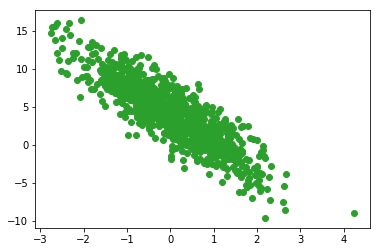

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,1].asnumpy(),y.asnumpy())
plt.show()

In [6]:
import random
batch_size=10
def data_iter():
#     产生一个随机索引
    idx=list(range(num_examples))
    random.shuffle(idx)  # 将所有元素随机排列
    for i in range(0,num_examples,batch_size):
        j=nd.array(idx[i:min(i+batch_size,num_examples)])
        yield nd.take(X,j),nd.take(y,j) # 获得数组的指定索引的数据

In [7]:
for data,label in data_iter():
    print(data,label)
    break


[[-1.0164676  -0.45853692]
 [-1.4248496   1.634742  ]
 [-1.0070884   0.1334201 ]
 [ 2.6923604   0.6542903 ]
 [ 0.8400261   1.3347815 ]
 [ 1.7955406   0.5066026 ]
 [-1.4933363  -2.392217  ]
 [-0.5513365   0.9980225 ]
 [-0.6047002   0.3973628 ]
 [-0.8226897  -1.4554818 ]]
<NDArray 10x2 @cpu(0)> 
[ 3.727216  -4.2019567  1.7316033  7.34665    1.3601375  6.067729
  9.34088   -0.2989917  1.6385019  7.5165896]
<NDArray 10 @cpu(0)>


In [9]:
w=nd.random_normal(shape=(num_inputs,1))
b=nd.zeros((1,))
params=[w,b]

In [10]:
for param in params:
    param.attach_grad()

In [11]:
def net(X):
    return nd.dot(X,w)+b

In [12]:
def square_loss(yhat,y):
#     注意：这里我们把y变形成yhat的形状来避免矩阵形状的自动转换
    return (yhat-y.reshape(yhat.shape))**2

In [13]:
def SGD(params,lr):
    for param in params:
        param[:]=param-lr*param.grad

In [18]:
# 模型函数
def real_fn(X):
    return true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
# 绘制损失随训练次数降低的折线图，以及预测值和真实值的散点图
def plot(losses, X, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size, 1].asnumpy(),
             net(X[:sample_size, :]).asnumpy(), 'or', label='Estimated')
    fg2.plot(X[:sample_size, 1].asnumpy(),
             real_fn(X[:sample_size, :]).asnumpy(), '*g', label='Real')
    fg2.legend()
    plt.show()

Epoch 0, batch 99. Moving avg of loss: 0.00013776913444789836. Average loss: 0.000149


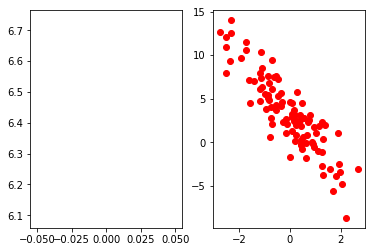

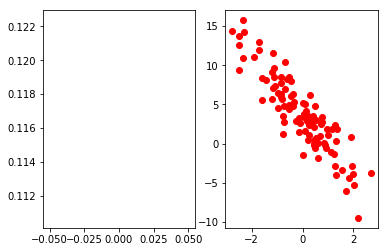

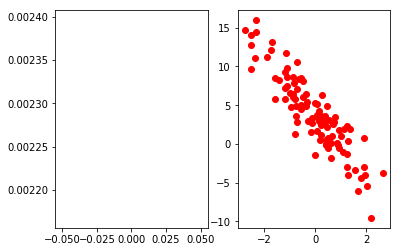

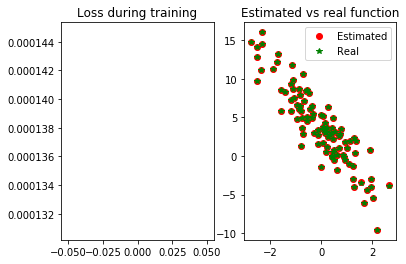

Epoch 1, batch 199. Moving avg of loss: 0.00010593952604801666. Average loss: 0.000096


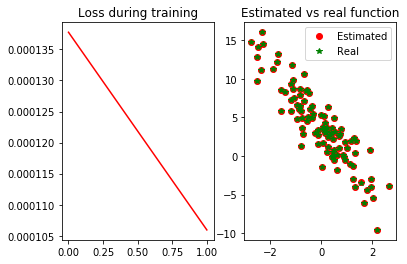

Epoch 2, batch 299. Moving avg of loss: 0.00010106321083018169. Average loss: 0.000096


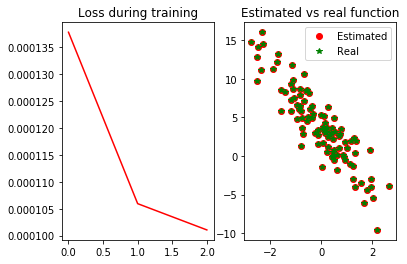

Epoch 3, batch 399. Moving avg of loss: 9.834149710423275e-05. Average loss: 0.000096


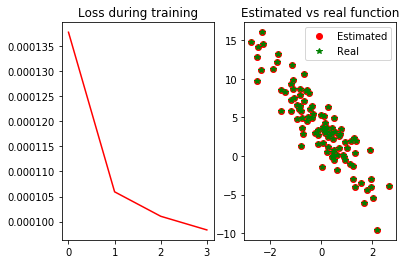

Epoch 4, batch 499. Moving avg of loss: 9.733435568556017e-05. Average loss: 0.000096


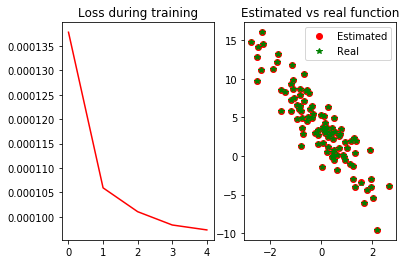

In [19]:
epochs = 5
learning_rate = .001
niter = 0
losses = []
moving_loss = 0
smoothing_constant = .01

# 训练
for e in range(epochs):    
    total_loss = 0

    for data, label in data_iter():
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        total_loss += nd.sum(loss).asscalar()

        # 记录每读取一个数据点后，损失的移动平均值的变化；
        niter +=1
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (1 - smoothing_constant) * moving_loss + (smoothing_constant) * curr_loss

        # correct the bias from the moving averages
        est_loss = moving_loss/(1-(1-smoothing_constant)**niter)

        if (niter + 1) % 100 == 0:
            losses.append(est_loss)
            print("Epoch %s, batch %s. Moving avg of loss: %s. Average loss: %f" % (e, niter, est_loss, total_loss/num_examples))
            plot(losses, X)

In [20]:
true_w,w

([2, -3.4], 
 [[ 1.9995353]
  [-3.399999 ]]
 <NDArray 2x1 @cpu(0)>)

In [21]:
true_b,b

(4.2, 
 [4.200405]
 <NDArray 1 @cpu(0)>)